<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Gaibor Cobos Sarai Josabeth** 
**22-02-2021**

### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [1]:
import miningscience as msc
help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)

Help on function mining_pubs in module miningscience:

mining_pubs(tipo, archivo)




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [2]:
import miningscience
import re
iv=miningscience.download_pubmed('Ecuador genomics')
b=re.findall(r'[DIMP]{4}\-.*\d\n',iv)
print ('El número de artículos es: ', len(b))
print ('El PMID del primero artículo es: ',b[0])

El número de artículos es:  193
El PMID del primero artículo es:  PMID- 35121084



## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [5]:
print ('DataFrames de pub_year')
fer=msc.mining_pubs('DP',iv)
print(fer.head(2))
print(fer.tail(2))
print (' ')
print ('DataFrames de pub_authors')
fi=msc.mining_pubs('AU',iv)
print(fi.head(2))
print(fi.tail(2))
print (' ')
print ('DataFrames de countries')
j=msc.mining_pubs('AD',iv)
print(j.head(2))
print(j.tail(2))

DataFrames de pub_year
        PMID DP_year
0   35121084    2022
1   35120121    2022
          PMID DP_year
191   17187350    2007
192    8661097    1996
 
DataFrames de pub_authors
        PMID  num_auth
0   35121084        12
1   35120121        14
          PMID  num_auth
191   17187350         1
192    8661097         9
 
DataFrames de countries
                 Country  num_auth
0                Andorra         1
1  United Arab Emirates          6
         Country  num_auth
88         Samoa         1
89  South Africa        29


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


Gráfica de distribución
Conteo artículos por año : [8, 15, 14, 1, 1, 23, 1, 1, 1, 21, 1, 36, 22, 2, 40, 6]
Promedio:  12.0625
Desviación estandar:  12.631650476085854


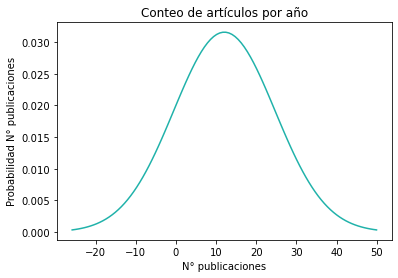

In [7]:
#Llamo a los paquetes que se van a utilizar para realizar la tabla y para graficar
#para
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import csv as csv

#Gráfica de Distribución Normal 
print ('Gráfica de distribución')
o = l.iloc[:,1]
w = pd.Series(o)
h = list(set(w))
g=w
f=h
h=[0]*len(f)
k=0
for elem in f:
    d=0
    for comp in g:
        if elem == str(comp):
            d=d+1
    h[k]=d
    k=k+1
print ('Conteo de artículos por año :',h)
mean = np.average(h)
print ('Promedio: ',mean)
stan = np.std(h)
print ('Desviación estandar: ',stan)
x = np.linspace(mean - 3*stan, mean + 3*stan, 100)
sigma = stan
label = '$\mu = %.1f, \ \sigma^2=%.1f$' %(mean, stan)
y_norm = stats.norm.pdf(x, mean, sigma)
plt.plot(x, y_norm, label=label, c = 'lightseagreen')
plt.xlabel('N° publicaciones')
plt.ylabel('Probabilidad N° publicaciones')
plt.title('Conteo de artículos por año')
plt.legend(title = "param")
plt.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [3]:
#Cargo mi data en mi notebook 
#Se tomó desde el segundo ID porque al tomar el primero la cadena me presentaba problemas y no me permitía 
#correr el código correctamente.
from Bio import SeqIO 
from Bio import AlignIO
from Bio import Phylo

with open ("Data/staphy.seq","r") :
    IDs = ["D83363.1","D83362.1","L37605.1","LC654888.1","FR775756.1","FR775755.1","U02913.1","LN681574.1","HG326658.1","HG326657.1"]
from Bio import Entrez      
from Bio import Entrez
#Enlazo con la pag NCBI con los IDs requeridos.
#llamos los datos de interes, lo que obtenga lo guardaré en un archivo .gb
Entrez.email = "sarai_nj27@hotmail.com" 
ofile = open('Data/staphy_gb.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= IDs) as handle:
    for seq_record in SeqIO.parse(handle, "gb"): 
         ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
         ofile.write(str(seq_record.seq)+'\n')
         ofile.write('\n')
#lo pongo en un archivo .fasta 
archivo_1=open('Data/staphy_ft.fasta','w')
with open("Data/staphy_gb.gb",'r') as genbank: 
    d=genbank.read()
    for line in d:
        archivo_1.write(str(line))
#Para alineamiento de secuencia 
from Bio.Align.Applications import ClustalwCommandline
import os
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/staphy_ft.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
# Leer alineamiento
ClustalAlign = AlignIO.read("data/staphy_ft.aln", "clustal")
print(ClustalAlign)
# Generar Dendogram (Tree)
from Bio import Phylo
tree = Phylo.read("data/staphy_ft.dnd", "newick")
Phylo.draw_ascii(tree)
#Para la construcción del árbol 
#Cargo mi alineamiento
# cargar alineamiento 
with open("data/staphy_ft.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

# Inicializar la calculadora de Distancias y del modelo 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

# Matriz de Distancias 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)


"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=Data/staphy_ft.fasta
Alignment with 10 rows and 1535 columns
TAGTGGTTTGAGTTACTCCTCTGCTCAGGATGAACGCTGGCGGC...--- HG326658.1Staphylococcus
-----------------------------------TCGAGCTG-...--- HG326657.1Staphylococcus
--------------------------AGGATGAACGCTGGCGGC...--- D83363.1Staphylococcus
----------------------------GATGAACGCTGGCGGC...--- L37605.1Staphylococcus
--------------------------AGGATGAACGCTGGCGGC...--- FR775755.1Staphylococcus
--------------------------AGGATGAACGCTGGCGGC...--- D83362.1Staphylococcus
----------------------------GATGAACGCTGGCGGC...--- LC654888.1Staphylococcus
--------------------------AGGATGAACGCTGGCGGC...--- FR775756.1Staphylococcus
----------------------------GATGAACGCTGGCGGC...AGG LN681574.1Staphylococcus
--------------------------------------------...--- U02913.1Staphylococcus
     , D83363.1Staphylococcus
   __|
  |  |   __________ HG326658.1Staphylococcus
 ,|  |__|
 ||     |________ HG326657.1Staphyloco

Tree(rooted=True)
    Clade(branch_length=0, name='Inner8')
        Clade(branch_length=0.0005191368078175801, name='Inner7')
            Clade(branch_length=0.0007837947882736035, name='Inner5')
                Clade(branch_length=0.019543973941368076, name='LN681574.1Staphylococcus')
                Clade(branch_length=1.0408340855860843e-17, name='LC654888.1Staphylococcus')
            Clade(branch_length=0.0005191368078176009, name='Inner6')
                Clade(branch_length=0.004519543973941336, name='Inner3')
                    Clade(branch_length=5.4288816503822446e-05, name='D83362.1Staphylococcus')
                    Clade(branch_length=0.0005971769815418249, name='FR775755.1Staphylococcus')
                Clade(branch_length=0.00297231270358308, name='Inner4')
                    Clade(branch_length=0.0007980456026059346, name='L37605.1Staphylococcus')
                    Clade(branch_length=0.44871335504885984, name='Inner2')
                        Clade(branch_length=

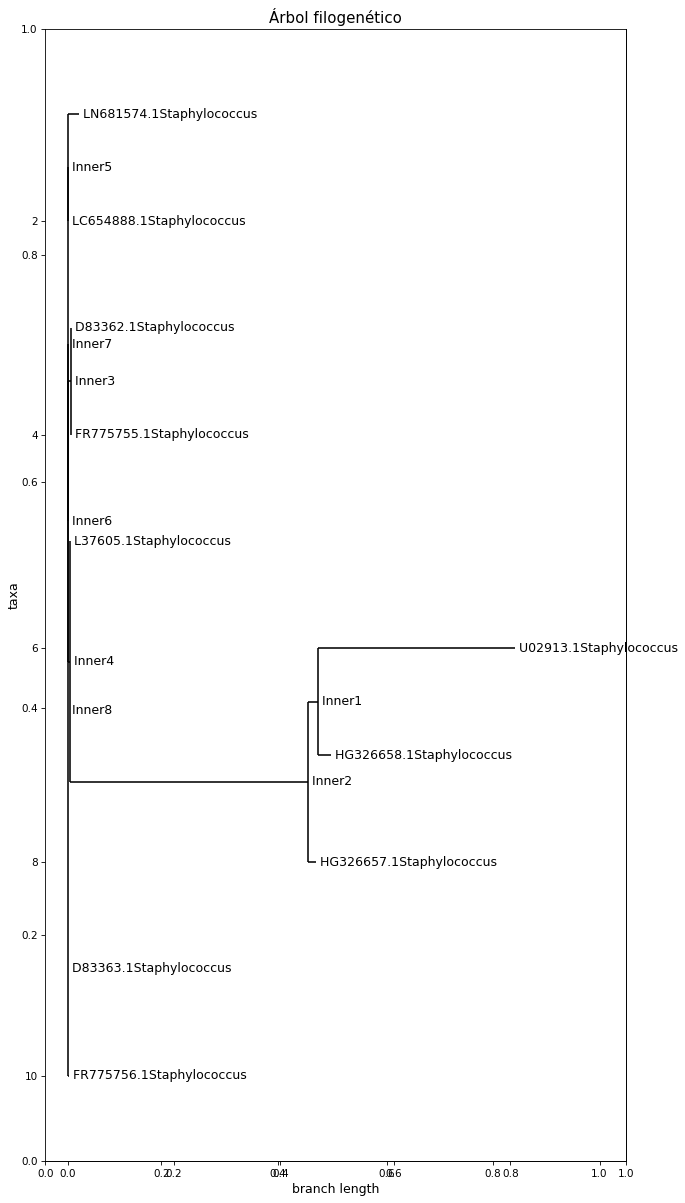

In [25]:
# Inicializar el constructor del arbol 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
staphy1_tree = constructor.build_tree(alignment)
staphy1_tree.rooted = True
print(staphy1_tree)
# Guardar el arbol 
Phylo.write(staphy1_tree, "data/staphy_tree.xml", "phyloxml")

staphy1_tree = Phylo.read(file="data/staphy_tree.xml", format= "phyloxml")

# Arbol  en Matplotlib
import matplotlib
import matplotlib.pyplot as plt

#Para tener eficiente visualización se utiliza el siguiente código 
fig = plt.figure(figsize=(10, 20), dpi=75) 
matplotlib.rc('font', size=12)              
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10) 
plt.title("Árbol filogenético")   # Establece el título del gráfico

axes = fig.add_subplot(1, 1, 1)
Phylo.draw(staphy1_tree, axes=axes)
fig.savefig("data/staphy_cladogram.png")


**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```